# Import Library and Load Data

In [1]:
# library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data
data = pd.read_csv('E-commerce Shipping Data.csv')
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


# 1. Missing and Duplicated Values Check

In [3]:
# General information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [4]:
# missing value check 
data.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [5]:
# duplicated rows check 
data.duplicated().sum()

0

*Luckily, there are no missing and duplicated values in this dataframe*

# 2. Statistical Summary Of Columns

In [6]:
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


*1. The min and max values for each variable in this data set seems normal*

*2. Distribution of customer_care_calls, close, while Cost_of_the_Product, Customer_rating, Prior_purchases look normal, becacuse the mean and the median are close, while discount_offered and weight_in_grams are indicated skewed*

In [7]:
data['Reached.on.Time_Y.N'].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

*'Reached.on.Time_Y.N' is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time. So, we can say that 59.67% shipments has not reached on time*

In [8]:
data['Customer_rating'].value_counts()

3    2239
1    2235
4    2189
5    2171
2    2165
Name: Customer_rating, dtype: int64

*customer rating where 1 is the lowest (Worst), 5 is the highest (Best). 40% of customers give bad rating (below the average) towards the shipment*

In [9]:
# categorical columns
categoricals = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
numericals = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']

In [10]:
data[categoricals].describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


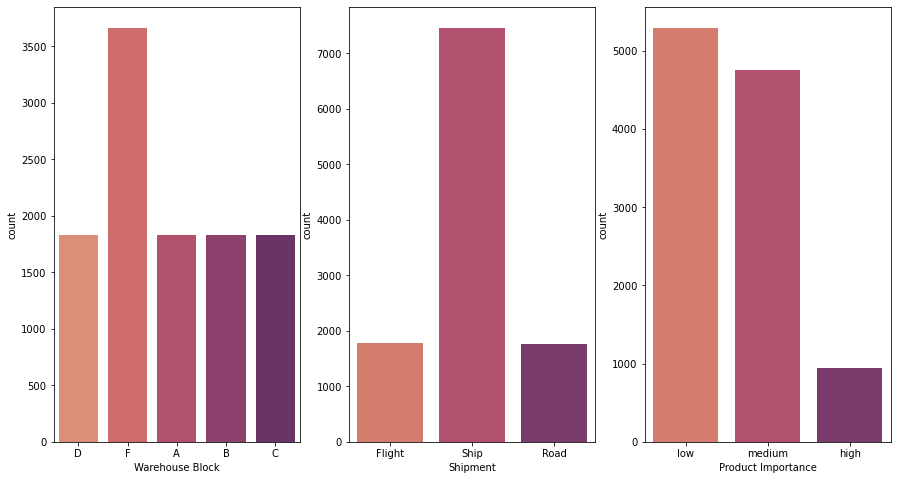

In [11]:
# categorical columns 
plt.figure(figsize = (15,8))
plt.subplot(1,3,1)
sns.countplot(data = data, x = 'Warehouse_block', palette='flare')
plt.xlabel('Warehouse Block', fontsize = 10)

plt.subplot(1,3,2)
sns.countplot(data = data, x = 'Mode_of_Shipment', palette='flare')
plt.xlabel('Shipment', fontsize = 10)

plt.subplot(1,3,3)
sns.countplot(data = data, x = 'Product_importance', palette='flare')
plt.xlabel('Product Importance', fontsize = 10)

plt.show()

*1. Warehouse block F holds most items*

*2. The dominant shipment mode is ship*

*3. mostly priority of products are low*

*4. Female customers are often shopping than male*


**Since the unique value for each columns are less than 10 I think we can use all cats feature for modelling (if needed)**

# 3. Univariate Analysis

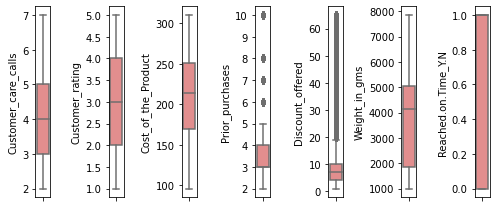

In [12]:
# Boxplot to detect outliers
features = numericals
plt.figure(figsize=(7,3))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='lightcoral')
    plt.tight_layout()

*there are outliers in Prior_purchase and Discount_offered data and we can handle with IQR method (if needed)*

C:\Users\kardo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kardo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kardo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

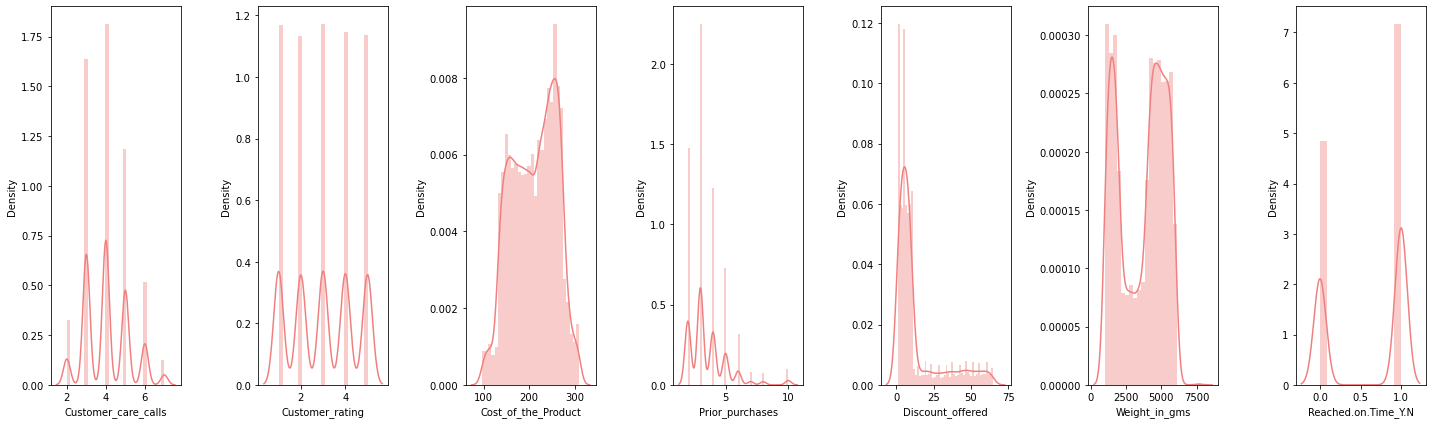

In [13]:
# KDE plot for knowing the distribution form
features = numericals
plt.figure(figsize=(20,6))
for i in range(0, len(features)):
    #plt.subplot(2, len(features)//2, i+1)
    plt.subplot(1, len(features), i+1)
    sns.distplot(x=data[features[i]], color='lightcoral')
    plt.xlabel(features[i])
    plt.tight_layout()

*True, 2 variables indicated skewed distribution and can be handle by log transformation (if needed)*

# 4. Multivariate Analysis

<AxesSubplot:>

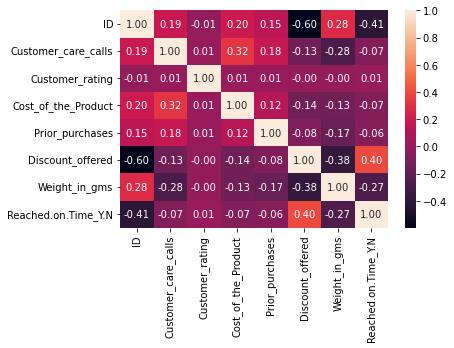

In [14]:
# correlation check using pearson's correlation
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

*1. Discount_offered have high positive correlation with Reached on Time or Not of 40%.*

*2. Weights_in_gms have negative correlation with Reached on Time or Not of -27%.*

*3. Discount Offered and weights in grams have negative correlation of -38%*

*4. Customer care calls and cost of the product have positive correlation of 32%*


**with the threshold of 0.8 for high correlation. We can say that there are no significant correlation for each variables. i.e we can use all variable for modelling process**

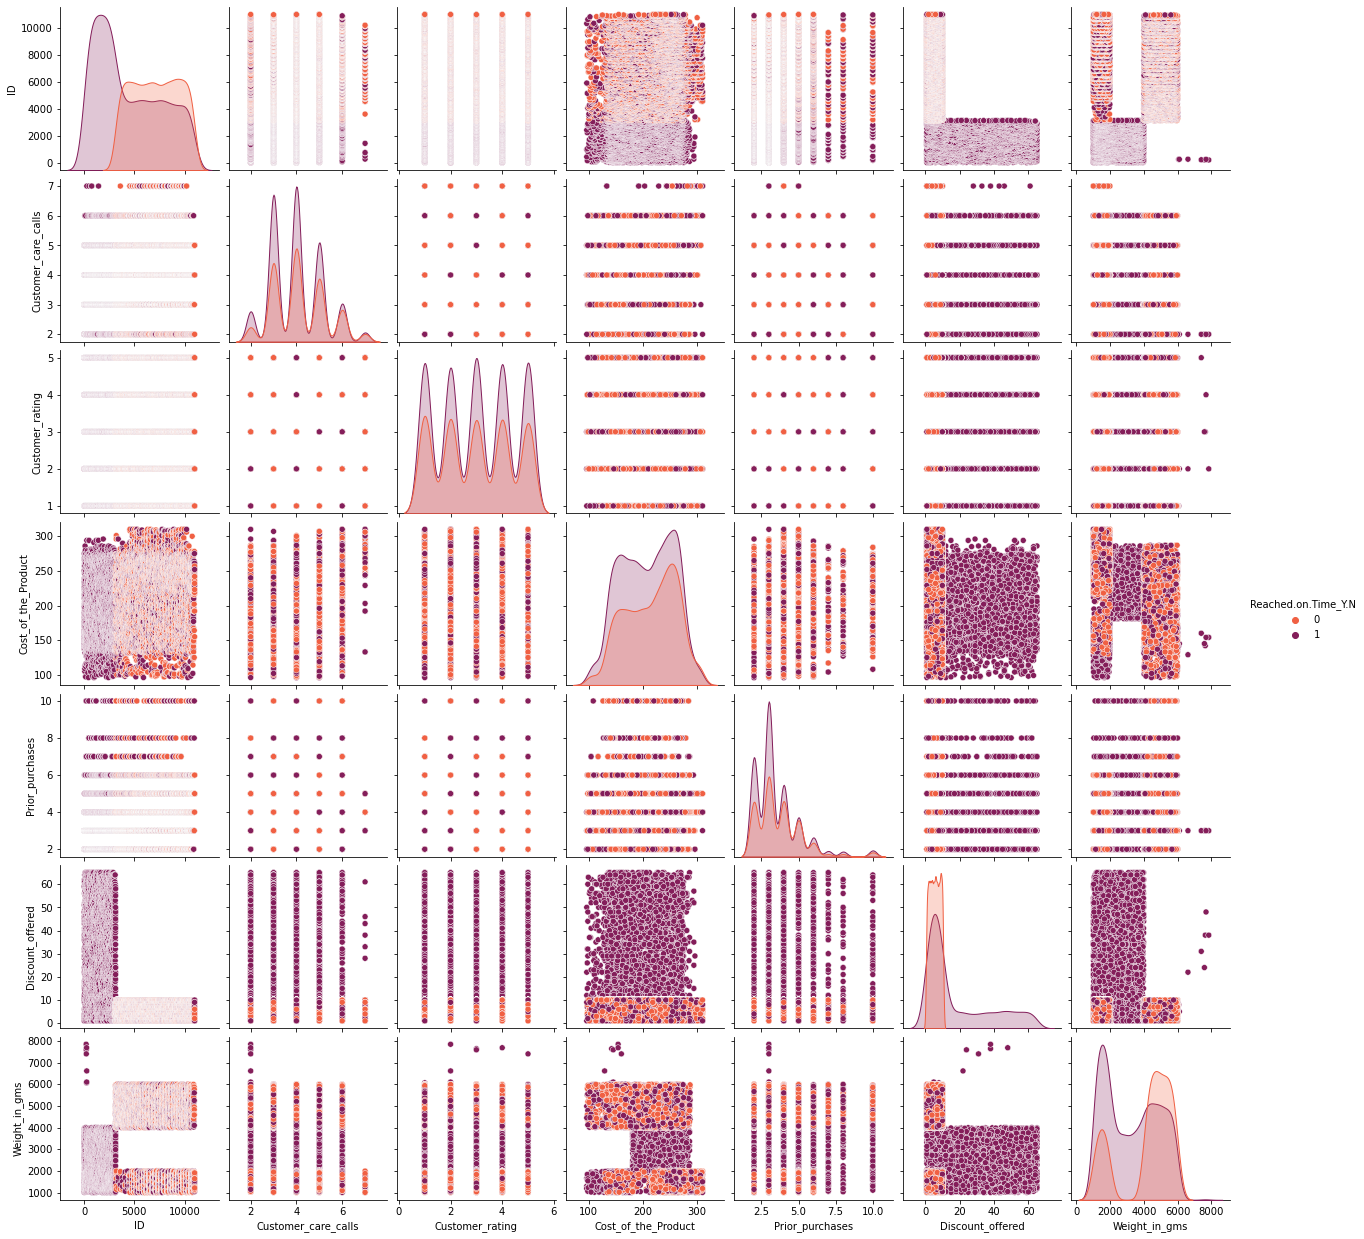

In [15]:
# scatter plot
sns.pairplot(data, palette = 'rocket_r', hue='Reached.on.Time_Y.N')

*1. the shipment tends to deliver on time when the discount under 10% and weight is 1 - 2 Kg & 4 - 6 Kg*

*2. the shipment tends to be ontime when the discount is under 10% on any product price*

**OTHER FEATURE CORRELATION**

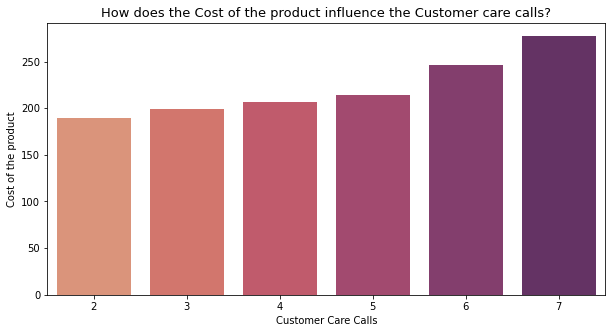

In [16]:
# cost of the produk vs customer care calls
plt.figure(figsize = (10,5))
sns.barplot(data=data, x = 'Customer_care_calls', y = 'Cost_of_the_Product', palette='flare', ci=False)
plt.xlabel('Customer Care Calls', fontsize = 10)
plt.ylabel('Cost of the product', fontsize = 10)
plt.title('How does the Cost of the product influence the Customer care calls?', fontsize = 13)
plt.show()

*we can say that as the cost of the product rises, so does the number of customer care calls*

Text(0.5, 1.0, 'How do the customer calls impact the discount offered?')

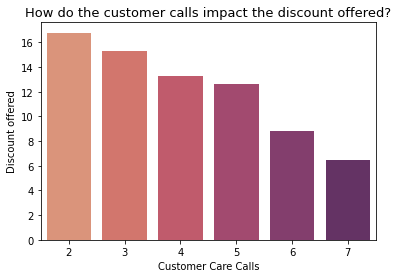

In [17]:
#customer care calls vs discount offered
sns.barplot(data = data, x = 'Customer_care_calls', y = 'Discount_offered', palette= 'flare', ci=False)
plt.xlabel('Customer Care Calls', fontsize = 10)
plt.ylabel('Discount offered', fontsize = 10)
plt.title('How do the customer calls impact the discount offered?', fontsize = 13)

*when customer care call count increases the discount decreases*

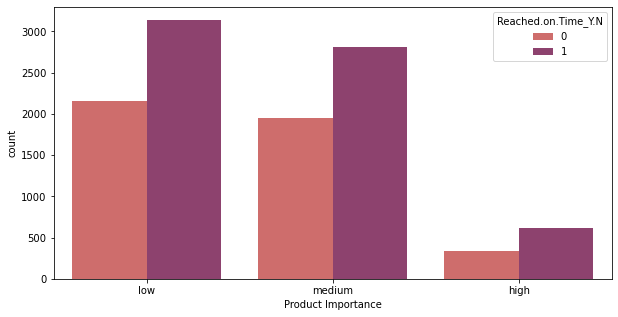

In [18]:
#product importance towards shipment
plt.figure(figsize = (10,5))
sns.countplot(data = data, x = 'Product_importance', palette='flare', hue = 'Reached.on.Time_Y.N')
plt.xlabel('Product Importance', fontsize = 10)
plt.show()

*regardless of what product importance, the products are delivered late nonetheless*

# EDA FINDINGS

1. The data does not contain major issues (no missing values and duplicated rows).
2. There are no extreme values for numerical features.
3. 5 features look normal and 2 features are indicated skewed, and also 2 features have an outlier.  
4. Mostly shipments type is 'ship' and in total 59.67% shipments has not reached on time and 40% of customers give bad rating (below the average)
5. There are no significant correlation for each features 
6. Discount_offered have positive correlation with Reached on Time or Not, and also Weights_in_gms have negative correlation with Reached on Time or Not.
7. Regardless of what product importance, the products are delivered late nonetheless